Coeficiente: [[784.79057581]]
Intersección: [6009.26373452]
Error cuadrático medio: 50112.47629985154


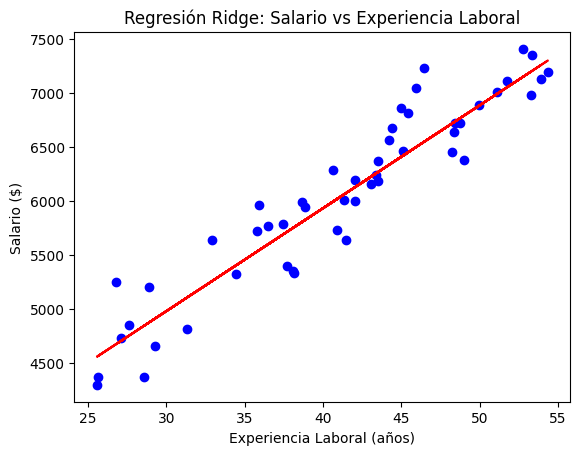

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Generar datos de ejemplo
np.random.seed(0)
experiencia_laboral = np.random.uniform(low=25, high=55, size=50).reshape(-1, 1)  # Experiencia laboral en años
salarios = 2000 + 100 * experiencia_laboral + np.random.normal(loc=0, scale=300, size=(50, 1))  # Salario en dólares

# Crear un DataFrame de Pandas para organizar los datos
data = pd.DataFrame({'Experiencia Laboral': experiencia_laboral.flatten(), 'Salario': salarios.flatten()})

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(experiencia_laboral, salarios, test_size=0.2, random_state=42)

# Normalizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión Ridge
ridge_model = Ridge(alpha=0.01)  # ajusta el valor de alpha según sea necesario

# Ajustar el modelo con los datos de entrenamiento normalizados
ridge_model.fit(X_train_scaled, y_train)

# Coeficiente y término independiente de la regresión Ridge
print('Coeficiente:', ridge_model.coef_)
print('Intersección:', ridge_model.intercept_)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = np.mean((ridge_model.predict(X_test_scaled) - y_test) ** 2)
print('Error cuadrático medio:', mse)

# Visualización de la regresión Ridge y los datos
plt.scatter(experiencia_laboral, salarios, color='blue')
plt.plot(experiencia_laboral, ridge_model.predict(scaler.transform(experiencia_laboral)), color='red')
plt.xlabel('Experiencia Laboral (años)')
plt.ylabel('Salario ($)')
plt.title('Regresión Ridge: Salario vs Experiencia Laboral')
plt.show()

In [ ]:
# Ajustar el modelo con los datos de entrenamiento normalizados
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train_scaled, y_train)

# Calcular el error cuadrático medio en el conjunto de prueba
mse = np.mean((ridge_model.predict(X_test_scaled) - y_test) ** 2)
print('Error cuadrático medio:', mse)

# Calcular el coeficiente de determinación (R^2)
r2 = ridge_model.score(X_test_scaled, y_test)
print('Coeficiente de determinación (R^2):', r2)


Error cuadrático medio: 50112.47629985154
Coeficiente de determinación (R^2): 0.9240406664144659


Interpretando estas métricas:

*   Un MSE más bajo indica un mejor rendimiento del modelo, ya que significa que los valores predichos están más cerca de los valores reales.
*   Un R^2 más alto (más cercano a 1) también indica un mejor rendimiento del modelo, ya que significa que una mayor proporción de la variabilidad en la variable dependiente está siendo explicada por las variables independientes.

In [ ]:
# Nuevas experiencias laborales para las cuales queremos predecir el salario
nuevas_experiencias_laborales = [[30], [35], [40], [45], [20], [33], [26], [25], [50], [55]]

for experiencia in nuevas_experiencias_laborales:
    # Escalar la nueva experiencia laboral utilizando el mismo escalador
    experiencia_scaled = scaler.transform([experiencia])

    # Realizar la predicción del salario para la nueva experiencia laboral
    salario_predicho = ridge_model.predict(experiencia_scaled)

    print('Salario predicho para', experiencia[0], 'años de experiencia laboral:', salario_predicho[0][0])


Salario predicho para 30 años de experiencia laboral: 4978.683336691077
Salario predicho para 35 años de experiencia laboral: 5454.762671274861
Salario predicho para 40 años de experiencia laboral: 5930.842005858645
Salario predicho para 45 años de experiencia laboral: 6406.92134044243
Salario predicho para 20 años de experiencia laboral: 4026.5246675235076
Salario predicho para 33 años de experiencia laboral: 5264.3309374413475
Salario predicho para 26 años de experiencia laboral: 4597.819869024049
Salario predicho para 25 años de experiencia laboral: 4502.604002107292
Salario predicho para 50 años de experiencia laboral: 6883.000675026215
Salario predicho para 55 años de experiencia laboral: 7359.080009609999
